# Problem Statement

Misclassifications can reveal a lot about the boundaries of performance of a classifier. Develop a visualization that helps dig into misclassified datapoints in the test set. A simple approach for a binary classifier would be to plot a histogram of the predicted class probabilities across the misclassified test samples in each class.



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os

In [2]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score

In [3]:
clf = RandomForestClassifier()
knn = KNeighborsClassifier(n_neighbors = 5)

In [4]:
current_dir = os.path.abspath(os.getcwd())

dataset_path = os.path.join(current_dir, '..', 'datasets', 'winequality.csv')

In [5]:
wine = pd.read_csv(dataset_path)
wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,recommend
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,False
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,False
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,False
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,False
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,False
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,False
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6,False
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,False
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,False
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6,False


Recommend column was dropped from the dataframe because it is 100% dependent on the quality column and would therefore cause bias in prediction

In [6]:
wine_m = wine.drop(['recommend'], axis=1)

In [7]:
import compare_model_function

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


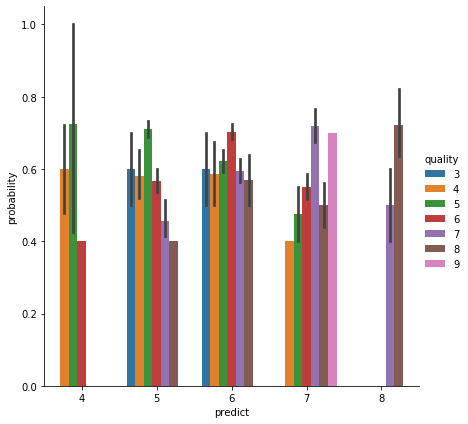

In [8]:
compare_model_function.plot_probability(wine_m, 'quality', clf)

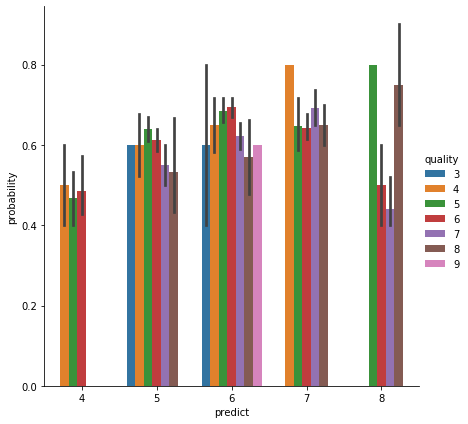

In [9]:
compare_model_function.plot_probability(wine_m, 'quality', knn)

## Misclassified Data

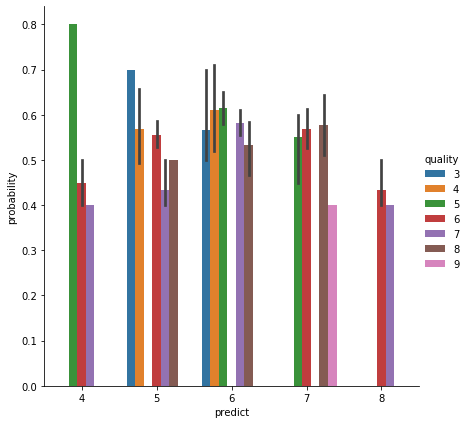

In [11]:
compare_model_function.plot_probability_misclassification(wine_m, 'quality', clf)

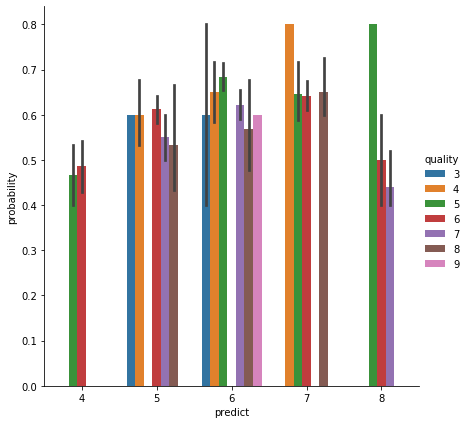

In [12]:
compare_model_function.plot_probability_misclassification(wine_m, 'quality', knn)